<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-A01793654/blob/main/Actividad6(IBM_Mod_3_EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ciencia y analítica de datos
## Actividad 5
### Cursos de IBM
### Data Analysis With Python
### Modulo 3
### Profesor: Jobish Vallikavungal Devassia
### Profesor Tutor: Roberto Antonio Guevara González
#### Bernardo Mijangos Flores
#### Matricula A01793654

### Laboratorio 3

Contenido:


1.   Importar Datos del modulo
2.   Análisis de patrones de características individuales mediante visualización
3.   Análisis Estadístico Descriptivo
4.   Conceptos básicos de agrupación
5.   Correlación y causalidad
6.   ANOVA

# Importar Datos

In [1]:
# usamos las librerias de pandas y numpy

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
# Estas líneas me permiten acceder al archivo que he cargado en Drive.

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
ruta = "/content/drive/MyDrive/DataSet/automobileEDA.csv"

In [4]:
df = pd.read_csv(ruta)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


Análisis de patrones de características individuales mediante visualización

In [5]:
# lista del tipo de datos de cada columna.

print(df.dtypes)


symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object


# Pregunta 1:

¿Cuál es el tipo de datos de la columna "peak-rpm"?

In [7]:
# para revisar el tipo de dato de la columna especifica

df['peak-rpm'].dtypes

dtype('float64')

In [8]:
# Para calcular la correlación entre variables de tipo "int64" o "float64" se usa el método "corr":

df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


# Pregunta 2:

Encuentre la correlación entre las siguientes columnas: bore, stroke, compression-ratio y horsepower.

In [16]:
# se utiliza df[[]] para las correlaciones

df[['bore','stroke','compression-ratio','horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001263,0.187923,1.000000,-0.214514
horsepower,0.566936,0.098462,-0.214514,1.000000


# Variables numéricas continuas:

Las variables numéricas continuas son variables que pueden contener cualquier valor dentro de algún rango. Pueden ser del tipo "int64" o "float64". Una excelente manera de visualizar estas variables es mediante diagramas de dispersión con líneas ajustadas.

Para comenzar a comprender la relación (lineal) entre una variable individual y el precio, podemos usar "regplot" que traza el diagrama de dispersión más la línea de regresión ajustada para los datos.

# Relacion lineal positiva

Encontrar el diagrama de dispersion de "engine-size" y "price".

(0.0, 53502.80808390522)

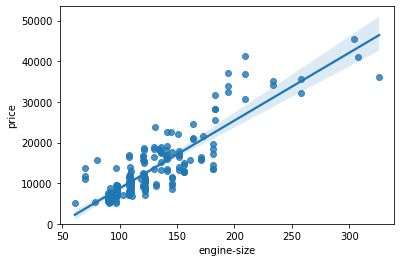

In [17]:
# El tamaño del motor como potencial variable predictora del precio

sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

A medida que aumenta el tamaño del motor, aumenta el precio: esto indica una correlación directa positiva entre estas dos variables. El tamaño del motor parece un indicador bastante bueno del precio, ya que la línea de regresión es casi una línea diagonal perfecta.

Podemos examinar la correlación entre 'engine-size' y 'price' y ver que es aproximadamente 0,87.

In [19]:
# para ver la correlacion de las columnas

df[["engine-size","price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


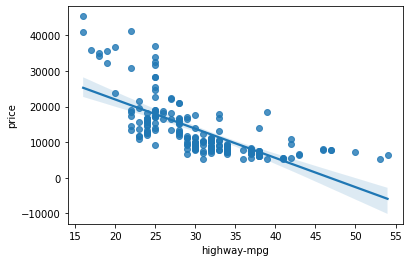

In [20]:
# Highway mpg es una variable predictora de Price

sns.regplot(x="highway-mpg", y="price", data=df)

A medida que aumenta highway-mpg, Price baja: esto indica una relación inversa/negativa entre estas dos variables. highway-mpg podría ser potencialmente un predictor Price.

Podemos examinar la correlación entre 'highway-mpg' y 'price' y ver que es aproximadamente -0.704.

In [21]:
df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


# Relación lineal débil

Ahora se revisamos si peak-rpm es una variable predictora de price

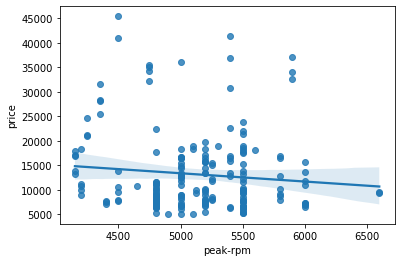

In [22]:
sns.regplot(x="peak-rpm", y="price", data=df)

Peak-rpm no parecen ser un buen predictor del priceo en absoluto, ya que la línea de regresión está cerca de la horizontal. Además, los puntos de datos están muy dispersos y lejos de la línea ajustada, mostrando mucha variabilidad. Por lo tanto, no es una variable confiable.

Podemos examinar la correlación entre 'peak-rpm' y 'price' y ver que es aproximadamente -0.101616.

In [23]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


# Pregunta 3 a):

Encuentra la correlación entre x="carrera" y y="precio".

In [25]:
df[["stroke","price"]].corr()

,stroke,price
stroke,1.00000,0.08231
price,0.08231,1.00000


# Pregunta 3 b):

Dados los resultados de la correlación entre "price" y "stroke", ¿espera una relación lineal?

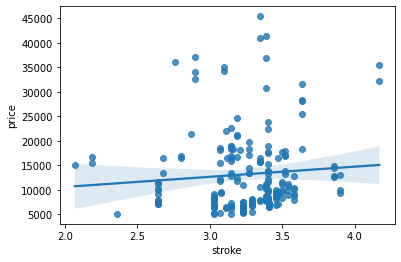

In [26]:
sns.regplot(x="stroke", y="price", data=df)

# Variables categoricas

Estas son variables que describen una 'característica' de una unidad de datos y se seleccionan de un pequeño grupo de categorías. Las variables categóricas pueden tener el tipo "objeto" o "int64". Una buena manera de visualizar variables categóricas es mediante diagramas de caja.

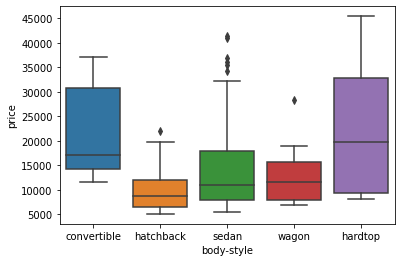

In [27]:
# Relacion entre "body-style" y "price"

sns.boxplot(x="body-style", y="price", data=df)


Vemos que las distribuciones de precio entre las diferentes categorías de body-style tienen una superposición significativa, por lo que el body-style no sería un buen predictor del price. Examinemos la "engine-location" y "price":

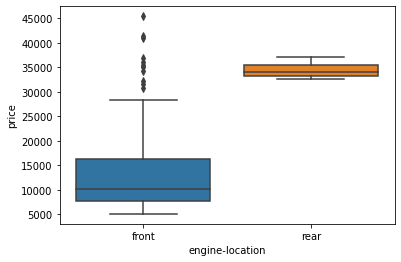

In [28]:
sns.boxplot(x="engine-location", y="price", data=df)

se observa que la distribución de price entre estas dos categorías de engine-location, front y rear, son lo suficientemente distintas como para tomar engine-location como un buen predictor potencial del price.

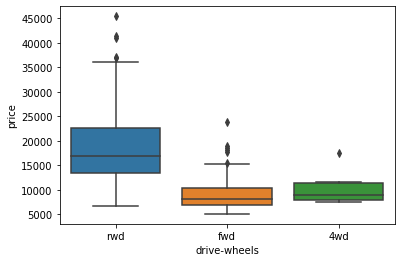

In [29]:
# Examinemos "drive-weels" y "price"

sns.boxplot(x="drive-wheels", y="price", data=df)


Aquí vemos que la distribución del price entre las diferentes categorías de drive-wheels es diferente. Como tal, drive-wheels podrían potencialmente predecir el price.

# 3. Análisis estadístico descriptivo

La función describe calcula automáticamente estadísticas básicas para todas las variables continuas. Cualquier valor de NaN se omite automáticamente en estas estadísticas.

Esto mostrará:

*  el conteo de esa variable
*  la media
*  la desviación estándar (std)
*  el valor mínimo
*  el IQR (Rango Intercuartílico: 25%, 50% y 75%)
*  el valor máximo

In [31]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [32]:
# se aplica el método "describe" sobre las variables de tipo 'object'

df.describe(include=['object'])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


# Value counts

Value Counts es una buena manera de entender cuántas unidades de cada característica/variable tenemos. Podemos aplicar el método "value_counts" en la columna "drive-wheels".

In [33]:
df['drive-wheels'].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

In [34]:
# convierte la serie a un dataframe

df['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,118
rwd,75
4wd,8


In [36]:
# se guardan los resultados del dataframe "drive_wheels_counts" 
# y se cambia el nombre de la columna 'drive-wheels' a 'value_counts'.

drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts

,value_counts
fwd,118
rwd,75
4wd,8


In [38]:
# cambia el nombre del índice a 'drive-wheels':

drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


In [39]:
# cambia el nombre de engine-location as variable

engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

,value_counts
engine-location,
front,198
rear,3



Después de examinar los valores de engine-location, vemos que la engine-location no sería una buena variable de predicción de price. Esto se debe a que solo tenemos tres autos con motor trasero y 198 con motor delantero, por lo que este resultado está sesgado. Por lo tanto, no podemos sacar ninguna conclusión sobre la engine-location.

# 4. Conceptos básicos de agrupación

El método "groupby" agrupa los datos por diferentes categorías. Los datos se agrupan en función de una o varias variables, y el análisis se realiza en los grupos individuales.

In [41]:
# se observan tres categorias para "drive-wheels"

df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [42]:
# Si queremos saber, en promedio, qué tipo de rueda motriz es más valiosa,
# podemos agrupar las "drive-wheels" y luego promediarlas.

df_group_one = df[['drive-wheels','body-style','price']]

In [43]:
# Luego se calcula el precio promedio para cada una de las diferentes categorías de datos.

df_group_one = df_group_one.groupby(['drive-wheels'],as_index=False).mean()
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


Según nuestros datos, parece que los vehículos con tracción trasera son, en promedio, los más caros, mientras que los de 4 ruedas y los de tracción delantera tienen aproximadamente el mismo precio.

In [44]:
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


Estos datos agrupados son mucho más fáciles de visualizar cuando se convierten en una tabla dinámica. Una tabla dinámica es como una hoja de cálculo de Excel, con una variable a lo largo de la columna y otra a lo largo de la fila. Podemos convertir el dataframe en una tabla dinámica usando el método "pivote" para crear una tabla dinámica a partir de los grupos.

In [46]:
# la variable drive-wheels se convierta en las columnas con pivot

grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [47]:
# se llena lass celdas que faltan con el valor 0

grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

# Pregunta 4:

Use la función "groupby" para encontrar "price" promedio de cada automóvil según el "body-style".

In [48]:
df_gptest2 = df[['body-style','price']]
grouped_test_bodystyle = df_gptest2.groupby(['body-style'],as_index= False).mean()
grouped_test_bodystyle

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


In [49]:
# librerias de matplot
import matplotlib.pyplot as plt
%matplotlib inline 

# Variables: Drive Wheels y Body Style vs Price

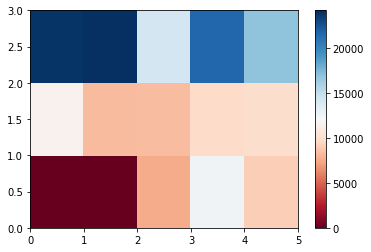

In [50]:
# se usa un mapa de calor para visualizar la relación entre Body-Style vs Price.

plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

El mapa de calor traza la variable objetivo (price) proporcional al color con respecto a las variables 'drive-wheels' y 'body-style' en el eje vertical y horizontal, respectivamente. Esto nos permite visualizar cómo se relaciona el precio con la 'drive-wheels' y el 'body-style'.

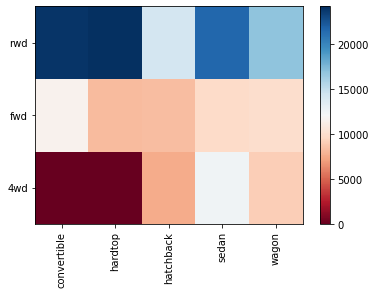

In [51]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

¿Cuáles son las características principales que tienen un mayor impacto en el precio del automóvil?".

Para obtener una mejor medida de las características importantes, observamos la correlación de estas variables con el precio del automóvil. En otras palabras: ¿cómo depende el precio del automóvil de esta variable?

# 5. Correlación y causalidad

*   Correlación: una medida del grado de interdependencia entre variables.

*   Causalidad: la relación entre causa y efecto entre dos variables.

Es importante saber la diferencia entre estos dos. La correlación no implica causa. Determinar la correlación es mucho más simple que determinar la causalidad, ya que la causalidad puede requerir una 
experimentación independiente.

Correlación de Pearson

La Correlación de Pearson mide la dependencia lineal entre dos variables X e Y.

El coeficiente resultante es un valor entre -1 y 1 inclusive, donde:

*   1: Correlación lineal positiva perfecta.
*   0: Sin correlación lineal, lo más probable es que las dos variables no se afecten entre sí.
*   -1: Correlación lineal negativa perfecta.

La correlación de Pearson es el método predeterminado de la función "corr"

In [52]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


A veces nos gustaría saber el significado de la correlación estimada.

P-value

¿Cuál es este P-value? P-value es el valor de probabilidad de que la correlación entre estas dos variables sea estadísticamente significativa. Normalmente, elegimos un nivel de significancia de 0.05, lo que significa que estamos 95% seguros de que la correlación entre las variables es significativa.

Por convención, cuando el

*   P-value es < 0.001: decimos que hay fuerte evidencia de que la correlación es significativa.
*   P-value es < 0,05: existe evidencia moderada de que la correlación es significativa.
*   P-value es < 0.1: hay evidencia débil de que la correlación es significativa.
*  P-value es > 0,1: no hay evidencia de que la correlación sea significativa.

Podemos obtener esta información usando el módulo "stats" en la biblioteca "scipy".

In [53]:
from scipy import stats

# Wheel-Base vs. Price

In [55]:
# calculo del coeficiente de correlacion Pearson y P-value de 'wheel-base' y 'price'.

pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.584641822265508  with a P-value of P = 8.076488270733218e-20


# Conclusion:

Dado que el P-value es < 0,001, la correlación entre wheel-base y price es estadísticamente significativa, aunque la relación lineal no es extremadamente fuerte (~0,585).

# Horsepower vs. Price

In [58]:
# calculo del coeficiente de correlacion Pearson y P-value de 'horsepower' y 'price'.

pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8095745670036559  with a P-value of P =  6.369057428260101e-48


# Conclusion:

Dado que el P-value es < 0,001, la correlación entre la potencia y el precio es estadísticamente significativa y la relación lineal es bastante fuerte (~0,809, cerca de 1).

# Length vs. Price

In [59]:
# calculo del coeficiente de correlacion Pearson y P-value de 'length' y 'price'.

pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.6906283804483638  with a P-value of P =  8.016477466159556e-30


# Conclusión:

Dado que P-value es < 0,001, la correlación entre longitud y precio es estadísticamente significativa y la relación lineal es moderadamente fuerte (~0,691).

# Width vs. Price

In [60]:
# calculo del coeficiente de correlacion Pearson y P-value de 'width' y 'price'.

pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value ) 

The Pearson Correlation Coefficient is 0.7512653440522673  with a P-value of P = 9.200335510481646e-38


# Conclusión:

Dado que P-value es < 0,001, la correlación entre el ancho y el precio es estadísticamente significativa y la relación lineal es bastante fuerte (~0,751).

# Curb-Weight vs. Price

In [61]:
# calculo del coeficiente de correlacion Pearson y P-value de 'curb-weight' y 'price'.

pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8344145257702843  with a P-value of P =  2.189577238894065e-53


# Conclusión:

Dado que P-value es < 0,001, la correlación entre el peso en vacío y el precio es estadísticamente significativa y la relación lineal es bastante fuerte (~0,834).

# Engine-Size vs. Price

In [62]:
# calculo del coeficiente de correlacion Pearson y P-value de 'engine-size' y 'price'.

pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.8723351674455185  with a P-value of P = 9.265491622198389e-64



# Conclusión:

Dado que P-value es < 0,001, la correlación entre el tamaño del motor y el precio es estadísticamente significativa y la relación lineal es muy fuerte (~0,872).

# Bore vs. Price

In [63]:
# calculo del coeficiente de correlacion Pearson y P-value de 'bore' y 'price'.

pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", p_value ) 

The Pearson Correlation Coefficient is 0.5431553832626602  with a P-value of P =   8.049189483935489e-17


# Conclusión:

Dado que P-value es < 0,001, la correlación entre el diámetro interior y el precio es estadísticamente significativa, pero la relación lineal es solo moderada (~0,521).

# City-mpg vs. Price

In [64]:
# # calculo del coeficiente de correlacion Pearson y P-value de 'city-mpg' y 'price'.

pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is -0.6865710067844678  with a P-value of P =  2.321132065567641e-29


# Conclusión:

Dado que P-value es < 0,001, la correlación entre ciudad-mpg y precio es estadísticamente significativa, y el coeficiente de alrededor de -0,687 muestra que la relación es negativa y moderadamente fuerte.

# Highway-mpg vs. Price

In [65]:
# calculo del coeficiente de correlacion Pearson y P-value de 'highway-mpg'' y 'price'.

pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value ) 

The Pearson Correlation Coefficient is -0.704692265058953  with a P-value of P =  1.7495471144476358e-31


# Conclusión:

Dado que el valor p es < 0,001, la correlación entre el mpg en carretera y el precio es estadísticamente significativa, y el coeficiente de alrededor de -0,705 muestra que la relación es negativa y moderadamente fuerte.

# 6 ANOVA

### ANOVA Análisis de Varianza

El Análisis de Varianza (ANOVA) es un método estadístico utilizado para probar si existen diferencias significativas entre las medias de dos o más grupos. ANOVA devuelve dos parámetros:

F-test score: ANOVA asume que las medias de todos los grupos son iguales, calcula cuánto se desvían las medias reales de la suposición y lo informa como la puntuación de la prueba F. Una puntuación mayor significa que hay una diferencia mayor entre las medias.

P-value: P-value indica cuán estadísticamente significativo es nuestro valor de puntaje calculado.

Si nuestra variable de precio está fuertemente correlacionada con la variable que estamos analizando, esperamos que ANOVA arroje una puntuación de prueba F considerable y un valor de p pequeño.

## Drive Wheels

Dado que ANOVA analiza la diferencia entre diferentes grupos de la misma variable, la función groupby será útil. Debido a que el algoritmo ANOVA promedia los datos automáticamente, no necesitamos tomar el promedio de antemano.

In [66]:
# diferentes tipos de 'drive-wheels' impactan en el 'price', agrupamos los datos.

grouped_test2=df_gptest[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test2.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
136,4wd,7603.0


In [67]:
df_gptest

,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0
...,...,...,...
196,rwd,sedan,16845.0
197,rwd,sedan,19045.0
198,rwd,sedan,21485.0
199,rwd,sedan,22470.0


In [68]:
# Podemos obtener los valores del grupo de métodos usando el método "get_group".

grouped_test2.get_group('4wd')['price']

4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

In [69]:
# uso de la función 'f_oneway' en el módulo 'stats' para obtener F-test score y P-value.
# ANOVA

f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 67.95406500780399 , P = 3.3945443577151245e-23


In [70]:
# fwd and rwd
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 130.5533160959111 , P = 2.2355306355677845e-23


In [71]:
# 4wd and rwd

f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('rwd')['price'])  
   
print( "ANOVA results: F=", f_val, ", P =", p_val) 

ANOVA results: F= 8.580681368924756 , P = 0.004411492211225333


In [72]:
# 4wd and fwd

f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('fwd')['price'])  
 
print("ANOVA results: F=", f_val, ", P =", p_val) 

ANOVA results: F= 0.665465750252303 , P = 0.41620116697845666


# Conclusión: Variables importantes

Ahora tenemos una mejor idea de cómo se ven nuestros datos y qué variables es importante tener en cuenta al predecir el precio del automóvil. Lo hemos reducido a las siguientes variables:

Variables numéricas continuas:

*  Length
*  Width
*  Curb-weight
*  Engine-size
*  Horsepower
*  City-mpg
*  Highway-mpg
*  Wheel-base
*  Bore

Variables categoricas:

*  Drive-wheels


A medida que avanzamos en la creación de modelos de aprendizaje automático para automatizar nuestro análisis, alimentar el modelo con variables que afecten de manera significativa a nuestra variable objetivo mejorará el rendimiento de predicción de nuestro modelo.